In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
FOLDER_NAME = "2024.05.09. Ac-kPHSRN+fibronektin"

!unzip "/content/drive/MyDrive/{FOLDER_NAME}.zip" -d "/content"

In [73]:
import glob
import cv2
from torch.utils.data import Dataset

file_names = glob.glob(FOLDER_NAME + "/*")
n_imgs = len(file_names)

class ImageDataset(Dataset):
  def __len__(self):
    return len(file_names)

  def __getitem__(self, idx):
    img = cv2.imread(file_names[idx], 0) # read in grayscale
    return img

dataset = ImageDataset()

In [81]:
import numpy as np

intensities = np.zeros(n_imgs)

for i in range(n_imgs):
  intensities[i] = np.mean(dataset[i])

avg_intensity = np.average(intensities)

sorted_indices = np.argsort(intensities)

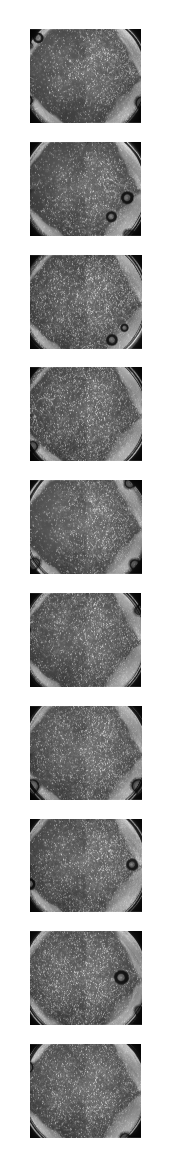

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 10, ncols = 1, dpi=300)

for i in range(10):
  ax[i].axis("off")
  ax[i].imshow(dataset[sorted_indices[i]], cmap="gray");

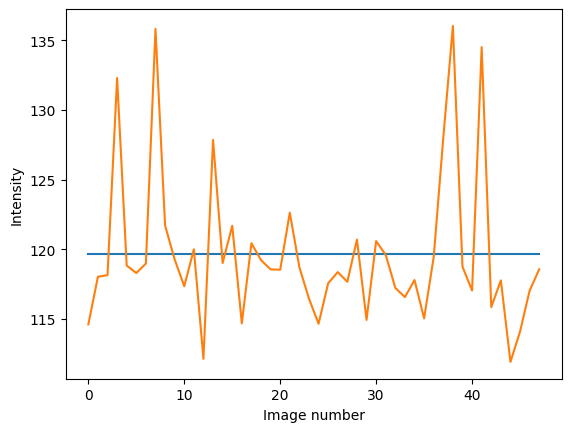

In [86]:
import numpy as np

intensities = np.zeros(n_imgs)
for i in range(n_imgs):
  intensities[i] = np.average(dataset[i])
avg_intensity = np.average(intensities)

plt.xlabel("Image number")
plt.ylabel("Intensity")
plt.plot(np.arange(n_imgs), np.full(n_imgs, avg_intensity))
plt.plot(np.arange(n_imgs), intensities)
plt.show();

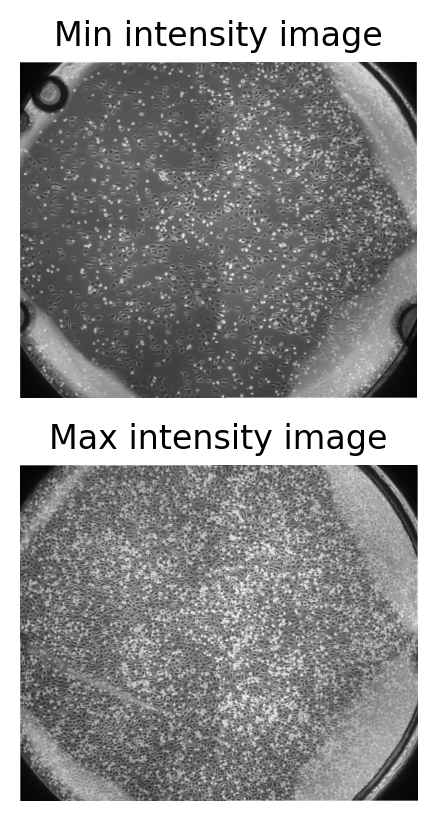

In [87]:
mn_id, mx_id = np.argmin(intensities), np.argmax(intensities)

fig, ax = plt.subplots(nrows = 2, ncols = 1, dpi = 200)

ax[0].title.set_text("Min intensity image")
ax[0].axis("off")
ax[0].imshow(dataset[mn_id], cmap="gray")
ax[1].title.set_text("Max intensity image")
ax[1].axis("off")
ax[1].imshow(dataset[mx_id], cmap="gray");

In [ ]:
# The count of cells for each image is needed to create a regression model.